# Module 02: Modeling Process

## Prerequisites

This module leverages the following packages.

In [12]:
# data management
# ! pip install -U pandas
# ! pip install -U numpy

# data visualization
# ! pip install -U matplotlib
# ! pip install -U plotnine

# modeling
# ! pip install -U scikit-learn

In [13]:
# Helper packages
import numpy as np
import pandas as pd
import math
# import plotnine
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle

# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score

Data used:

In [14]:
# Ames housing data
ames = pd.read_csv("../../00-data/ML/ames.csv")

# Job attrition data
attrition = pd.read_csv("../../00-data/ML/attrition.csv")

## Data splitting

### Simple random sampling

In [15]:
# create train/test split
train, test = train_test_split(ames, train_size=0.7, random_state=123)

# dimensions of training data
train.shape

(2051, 81)

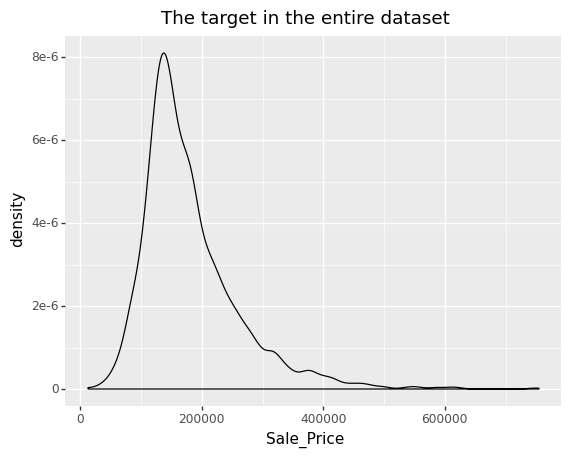

<ggplot: (17592064878713)>

In [16]:
(ggplot(ames, aes('Sale_Price'))
 + geom_density()
 + ggtitle("The target in the entire dataset"))

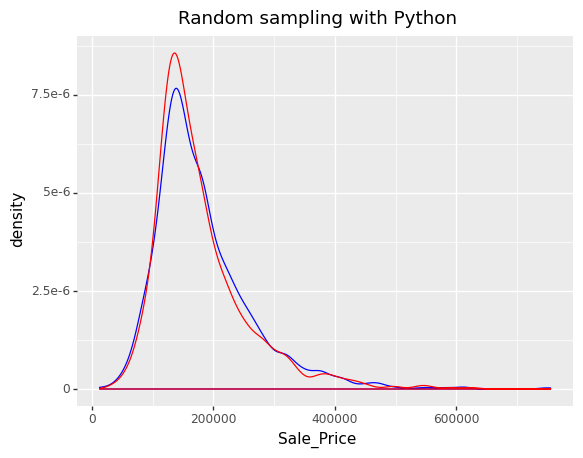

<ggplot: (17592003521106)>

In [17]:
(ggplot(train, aes('Sale_Price'))
 + geom_density(color = "blue")
 + geom_density(data = test, color = "red")
 + ggtitle("Random sampling with Python"))

### Stratified sampling

In [18]:
y = attrition["Attrition"]
train_strat, test_strat = train_test_split(attrition, train_size=0.3, random_state=123, stratify=y)

In [19]:
# response distribution for raw data
attrition["Attrition"].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [20]:
# response distribution for training data
train_strat["Attrition"].value_counts(normalize=True)

No     0.839002
Yes    0.160998
Name: Attrition, dtype: float64

In [21]:
# response distribution for test data
test_strat["Attrition"].value_counts(normalize=True)

No     0.838678
Yes    0.161322
Name: Attrition, dtype: float64

## Creating models

In [22]:
# separate features from labels
X_train = train[["Gr_Liv_Area", "Year_Built"]]
y_train = train["Sale_Price"]

# fit a KNN regression model with 10 neighbors
knn = KNeighborsRegressor(n_neighbors=10)
m1 = knn.fit(X_train, y_train)

m1

KNeighborsRegressor(n_neighbors=10)

In [23]:
# Y_ha†
m1.predict(X_train)

array([203900. , 129440. , 147725. , ..., 342814.3, 183370. , 142476.9])

In [24]:
# y_i
y_train

2278    130000
1379    109900
2182    140000
1436    207500
1599     98000
         ...  
1147    193000
2154    285000
1766    252000
1122    182000
1346    123500
Name: Sale_Price, Length: 2051, dtype: int64

## Evaluating models

### Regression model

In [25]:
pred = m1.predict(X_train)

# compute MSE
mse = mean_squared_error(y_train, pred)
mse

1847222418.5236325

In [26]:
# compute RMSE
math.sqrt(mse)

42979.32547776469

### Classification model

In [27]:
# convert response to binary ints
train_strat["Attrition"].replace(('Yes', 'No'), (1, 0), inplace=True)

# separate features from labels
X_train_strat = train_strat[["DistanceFromHome"]]
y_train_strat = np.array(train_strat["Attrition"])

# fit a KNN regression model with 10 neighbors
knn2 = KNeighborsClassifier(n_neighbors=10)
m2 = knn2.fit(X_train_strat, y_train_strat)

# make predictions
pred = m2.predict_proba(X_train_strat)

# compute AUC
roc_auc_score(y_train_strat, pred[:, 1])

0.6317853064331937

## Resampling

In [28]:
# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# fit model with 10-fold CV
results = cross_val_score(m1, X_train, y_train, cv=kfold, scoring=loss)
results

array([-45288.08907837, -38195.80466399, -54078.61784201, -45002.59566265,
       -43135.12403823, -51398.1534832 , -44304.25191978, -44235.0923495 ,
       -45980.14397491, -56898.76450326])

In [29]:
results.mean()

-46851.6637515894

In [30]:
# 10 fold cross validation repated 5 times (total of 50 folds)
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
results = cross_val_score(m1, X_train, y_train, cv=rfk, scoring=loss)
results

array([-45288.08907837, -38195.80466399, -54078.61784201, -45002.59566265,
       -43135.12403823, -51398.1534832 , -44304.25191978, -44235.0923495 ,
       -45980.14397491, -56898.76450326, -40013.51928598, -45818.63483604,
       -47210.6365969 , -46365.5028337 , -52677.72650218, -42394.64249234,
       -50407.90655521, -56779.45947234, -37416.8662207 , -51022.24552443,
       -47816.2378878 , -41166.91703089, -42661.49098682, -50691.81214397,
       -44461.74749195, -58296.75292093, -57254.75268516, -47037.18220218,
       -39219.75730258, -46384.36469261, -45281.71496915, -48133.00479238,
       -43588.73909672, -55773.69203336, -41924.84638494, -47082.4682018 ,
       -50772.70586493, -47037.10052868, -47315.32968019, -47967.4148923 ,
       -54614.68718371, -43526.03797856, -50142.97369225, -38974.26943545,
       -54522.49859942, -45265.16705034, -39318.70812015, -53356.93062506,
       -49775.62616872, -45359.15338995])

In [31]:
# average RMSE across all 50 folds
results.mean()

-47266.95723737298

## Hyperparameter tuning

In [32]:
# basic model object
knn = KNeighborsRegressor()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 26)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

46638.060667071586

In [33]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

13

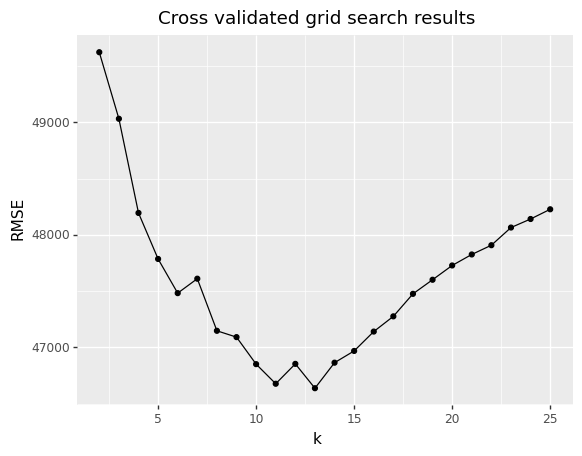

<ggplot: (17592003432355)>

In [34]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 26), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

## Putting the processes together

In [35]:
# create train/test split
train, test = train_test_split(ames, train_size=0.7, random_state=123)

# separate features from labels and only use numeric features
X_train = train.select_dtypes(include='number').drop("Sale_Price", axis=1)
y_train = train["Sale_Price"]

# create KNN model object
knn = KNeighborsRegressor()

# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 26)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
abs(results.best_score_)

41915.408581298376

In [36]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

5

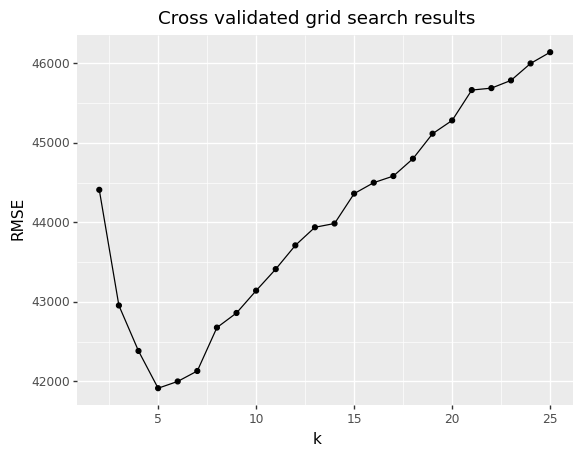

<ggplot: (17592003374933)>

In [37]:
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 26), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

## Exercises

1. Load the Boston housing data set and split it into a training set and test set using a 70-30% split.

   - How many observations are in the training set and test set?
   - Compare the distribution of `cmedv` between the training set and test set.

2. Fit a KNN model where $k=5$ that uses all available features to predict `cmedv`. How does the MSE/RMSE compare across these models?

3. Perform a 10-fold cross-validated KNN model, repeated 5 times, that uses all available features to predict `cmedv`. 

   - What is the average RMSE across all 50 model iterations?
   - Plot the distribution of the RMSE across all 50 model iterations.
   - Describe the results.

4. Now perform a hyperparameter grid search where _k_ ranges from 2--20 and apply 10-fold CV repeated 5 times.